# Projet 7 : Implémentez un modèle de scoring 

In [1]:
#imports 
import pandas as pd

import numpy as np
from numpy import array
from numpy import argmax

import os
import datetime
import time
import random
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
   
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Data loading 

In [2]:
#traduire les labels en anglais
directory= "../data/"
df_application_test = pd.read_csv(directory+"application_test.csv", error_bad_lines=False, sep=',')
df_application_train = pd.read_csv(directory+"application_train.csv", error_bad_lines=False, sep=',')
df_bureau= pd.read_csv(directory+'bureau.csv', error_bad_lines=False, sep=',')
df_bureau_balance = pd.read_csv(directory+'bureau_balance.csv', error_bad_lines=False, sep=',')
df_credit_card_balance = pd.read_csv(directory+"credit_card_balance.csv", error_bad_lines=False, sep=',')
df_installments_payments = pd.read_csv(directory+"installments_payments.csv", error_bad_lines=False, sep=',')
df_POS_CASH_balance = pd.read_csv(directory+"POS_CASH_balance.csv", error_bad_lines=False, sep=',')
df_previous_application = pd.read_csv(directory+"previous_application.csv", error_bad_lines=False, sep=',')
df_sample_submission = pd.read_csv(directory+"sample_submission.csv", error_bad_lines=False, sep=',')

df_file_list= [df_application_test, df_application_train, df_bureau, df_bureau_balance, df_credit_card_balance, df_installments_payments, df_POS_CASH_balance, df_previous_application, df_sample_submission]

## Data discovery

In [3]:
def count_null_per_column(df):
    columns = df.columns 
    for c in columns :
        print(c + "      "+str(df[c].isna().sum()))

In [4]:
def primary_key_columns (df):
    for c in df.columns :
        if c.startswith('SK_') :
            print(c)

In [5]:
df_application_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [6]:
primary_key_columns (df_application_test)

SK_ID_CURR


In [7]:
df_application_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [8]:
count_null_per_column(df_application_test)

SK_ID_CURR      0
NAME_CONTRACT_TYPE      0
CODE_GENDER      0
FLAG_OWN_CAR      0
FLAG_OWN_REALTY      0
CNT_CHILDREN      0
AMT_INCOME_TOTAL      0
AMT_CREDIT      0
AMT_ANNUITY      24
AMT_GOODS_PRICE      0
NAME_TYPE_SUITE      911
NAME_INCOME_TYPE      0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS      0
NAME_HOUSING_TYPE      0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH      0
DAYS_EMPLOYED      0
DAYS_REGISTRATION      0
DAYS_ID_PUBLISH      0
OWN_CAR_AGE      32312
FLAG_MOBIL      0
FLAG_EMP_PHONE      0
FLAG_WORK_PHONE      0
FLAG_CONT_MOBILE      0
FLAG_PHONE      0
FLAG_EMAIL      0
OCCUPATION_TYPE      15605
CNT_FAM_MEMBERS      0
REGION_RATING_CLIENT      0
REGION_RATING_CLIENT_W_CITY      0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START      0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION      0
REG_CITY_NOT_LIVE_CITY      0
REG_CITY_NOT_WORK_CITY      0
LIVE_CITY_NOT_WORK_CITY      0
ORGANIZATION_TYPE      

In [9]:
df_application_test.shape

(48744, 121)

In [10]:
def get_dtypes(df):
    for type_ in df.dtypes:
        print (type_)
get_dtypes(df_application_test)

int64
object
object
object
object
int64
float64
float64
float64
float64
object
object
object
object
object
float64
int64
int64
float64
int64
float64
int64
int64
int64
int64
int64
int64
object
float64
int64
int64
object
int64
int64
int64
int64
int64
int64
int64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
float64
object
object
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64


In [11]:
df_application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
df_application_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
count_null_per_column(df_application_train)

SK_ID_CURR      0
TARGET      0
NAME_CONTRACT_TYPE      0
CODE_GENDER      0
FLAG_OWN_CAR      0
FLAG_OWN_REALTY      0
CNT_CHILDREN      0
AMT_INCOME_TOTAL      0
AMT_CREDIT      0
AMT_ANNUITY      12
AMT_GOODS_PRICE      278
NAME_TYPE_SUITE      1292
NAME_INCOME_TYPE      0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS      0
NAME_HOUSING_TYPE      0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH      0
DAYS_EMPLOYED      0
DAYS_REGISTRATION      0
DAYS_ID_PUBLISH      0
OWN_CAR_AGE      202929
FLAG_MOBIL      0
FLAG_EMP_PHONE      0
FLAG_WORK_PHONE      0
FLAG_CONT_MOBILE      0
FLAG_PHONE      0
FLAG_EMAIL      0
OCCUPATION_TYPE      96391
CNT_FAM_MEMBERS      2
REGION_RATING_CLIENT      0
REGION_RATING_CLIENT_W_CITY      0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START      0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION      0
REG_CITY_NOT_LIVE_CITY      0
REG_CITY_NOT_WORK_CITY      0
LIVE_CITY_NOT_WORK_CITY      0
ORGAN

In [14]:
df_application_train.shape

(307511, 122)

In [15]:
print(len(df_application_train['SK_ID_CURR'].unique()))

307511


In [16]:
get_dtypes(df_application_train)

int64
int64
object
object
object
object
int64
float64
float64
float64
float64
object
object
object
object
object
float64
int64
int64
float64
int64
float64
int64
int64
int64
int64
int64
int64
object
float64
int64
int64
object
int64
int64
int64
int64
int64
int64
int64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
float64
object
object
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64


In [17]:
df_bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [18]:
primary_key_columns (df_bureau)

SK_ID_CURR
SK_ID_BUREAU


In [19]:
df_bureau.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


In [20]:
count_null_per_column(df_bureau)

SK_ID_CURR      0
SK_ID_BUREAU      0
CREDIT_ACTIVE      0
CREDIT_CURRENCY      0
DAYS_CREDIT      0
CREDIT_DAY_OVERDUE      0
DAYS_CREDIT_ENDDATE      105553
DAYS_ENDDATE_FACT      633653
AMT_CREDIT_MAX_OVERDUE      1124488
CNT_CREDIT_PROLONG      0
AMT_CREDIT_SUM      13
AMT_CREDIT_SUM_DEBT      257669
AMT_CREDIT_SUM_LIMIT      591780
AMT_CREDIT_SUM_OVERDUE      0
CREDIT_TYPE      0
DAYS_CREDIT_UPDATE      0
AMT_ANNUITY      1226791


In [21]:
get_dtypes(df_bureau)

int64
int64
object
object
int64
int64
float64
float64
float64
int64
float64
float64
float64
float64
object
int64
float64


In [22]:
df_bureau.shape

(1716428, 17)

In [23]:
df_bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [24]:
df_bureau_balance.head(3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


In [25]:
primary_key_columns (df_bureau_balance)

SK_ID_BUREAU


In [26]:
df_bureau_balance.shape

(27299925, 3)

In [27]:
count_null_per_column(df_bureau_balance)

SK_ID_BUREAU      0
MONTHS_BALANCE      0
STATUS      0


In [28]:
get_dtypes(df_bureau_balance)

int64
int64
object


In [29]:
df_credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [30]:
primary_key_columns (df_credit_card_balance)

SK_ID_PREV
SK_ID_CURR
SK_DPD
SK_DPD_DEF


In [31]:
df_credit_card_balance.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


In [32]:
count_null_per_column(df_credit_card_balance)

SK_ID_PREV      0
SK_ID_CURR      0
MONTHS_BALANCE      0
AMT_BALANCE      0
AMT_CREDIT_LIMIT_ACTUAL      0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT      0
AMT_DRAWINGS_OTHER_CURRENT      749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY      305236
AMT_PAYMENT_CURRENT      767988
AMT_PAYMENT_TOTAL_CURRENT      0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE      0
AMT_TOTAL_RECEIVABLE      0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT      0
CNT_DRAWINGS_OTHER_CURRENT      749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM      305236
NAME_CONTRACT_STATUS      0
SK_DPD      0
SK_DPD_DEF      0


In [33]:
get_dtypes(df_credit_card_balance)

int64
int64
int64
float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
float64
float64
float64
object
int64
int64


In [34]:
df_credit_card_balance.shape

(3840312, 23)

In [35]:
df_installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [36]:
primary_key_columns (df_installments_payments)

SK_ID_PREV
SK_ID_CURR


In [37]:
df_installments_payments.head(3)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


In [38]:
count_null_per_column(df_installments_payments)

SK_ID_PREV      0
SK_ID_CURR      0
NUM_INSTALMENT_VERSION      0
NUM_INSTALMENT_NUMBER      0
DAYS_INSTALMENT      0
DAYS_ENTRY_PAYMENT      2905
AMT_INSTALMENT      0
AMT_PAYMENT      2905


In [39]:
get_dtypes(df_installments_payments)

int64
int64
float64
int64
float64
float64
float64
float64


In [40]:
df_POS_CASH_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [41]:
primary_key_columns (df_POS_CASH_balance)

SK_ID_PREV
SK_ID_CURR
SK_DPD
SK_DPD_DEF


In [42]:
df_POS_CASH_balance.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


In [43]:
count_null_per_column(df_POS_CASH_balance)

SK_ID_PREV      0
SK_ID_CURR      0
MONTHS_BALANCE      0
CNT_INSTALMENT      26071
CNT_INSTALMENT_FUTURE      26087
NAME_CONTRACT_STATUS      0
SK_DPD      0
SK_DPD_DEF      0


In [44]:
get_dtypes(df_POS_CASH_balance)

int64
int64
int64
float64
float64
object
int64
int64


In [45]:
df_previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [46]:
primary_key_columns (df_previous_application)

SK_ID_PREV
SK_ID_CURR


In [47]:
df_previous_application.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [48]:
count_null_per_column(df_previous_application)

SK_ID_PREV      0
SK_ID_CURR      0
NAME_CONTRACT_TYPE      0
AMT_ANNUITY      372235
AMT_APPLICATION      0
AMT_CREDIT      1
AMT_DOWN_PAYMENT      895844
AMT_GOODS_PRICE      385515
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START      0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY      0
RATE_DOWN_PAYMENT      895844
RATE_INTEREST_PRIMARY      1664263
RATE_INTEREST_PRIVILEGED      1664263
NAME_CASH_LOAN_PURPOSE      0
NAME_CONTRACT_STATUS      0
DAYS_DECISION      0
NAME_PAYMENT_TYPE      0
CODE_REJECT_REASON      0
NAME_TYPE_SUITE      820405
NAME_CLIENT_TYPE      0
NAME_GOODS_CATEGORY      0
NAME_PORTFOLIO      0
NAME_PRODUCT_TYPE      0
CHANNEL_TYPE      0
SELLERPLACE_AREA      0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT      372230
NAME_YIELD_GROUP      0
PRODUCT_COMBINATION      346
DAYS_FIRST_DRAWING      673065
DAYS_FIRST_DUE      673065
DAYS_LAST_DUE_1ST_VERSION      673065
DAYS_LAST_DUE      673065
DAYS_TERMINATION      673065
NFLAG_INSURED_ON_APPROVAL  

In [49]:
get_dtypes(df_previous_application)

int64
int64
object
float64
float64
float64
float64
float64
object
int64
object
int64
float64
float64
float64
object
object
int64
object
object
object
object
object
object
object
object
int64
object
float64
object
object
float64
float64
float64
float64
float64
float64


In [50]:
df_sample_submission.describe()

,SK_ID_CURR,TARGET
count,48744.000000,48744.0
mean,277796.676350,0.5
std,103169.547296,0.0
min,100001.000000,0.5
25%,188557.750000,0.5
50%,277549.000000,0.5
75%,367555.500000,0.5
max,456250.000000,0.5


In [51]:
primary_key_columns (df_sample_submission)

SK_ID_CURR


In [52]:
df_sample_submission.head(3)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5


In [53]:
count_null_per_column(df_sample_submission)

SK_ID_CURR      0
TARGET      0


In [54]:
get_dtypes(df_sample_submission)

int64
float64


In [55]:
df_sample_submission.shape

(48744, 2)

In [56]:
final_client_df = pd.DataFrame()
final_client_df['SK_ID_CURR'] = df_sample_submission['SK_ID_CURR']
final_client_df['TARGET'] = df_sample_submission['TARGET']

In [57]:
final_client_df['TARGET'].unique()

array([0.5])

# Ingénierie des variables

#### Step 1 : types, nulls,  ditribution evaluation

In [58]:
def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df

In [59]:
#histogrammes des variables quanti
def get_numerical_categorical(df) :
    numerical = []
    category = []
    for y in df.columns:
        if(df[y].dtype == np.float64 or df[y].dtype == np.int64) :
            numerical.append(y)
        else :
            category.append(y)
            df[y].astype('category')
    #category.append('Zip Codes')
    return numerical, category

In [60]:
#fonction qui retourne le pourcentage de null dans le dataframe
def null_ratio(df):
    null_values = df.isna().sum().sum()
    not_null_values = df.count().sum()
    pourcentage =null_values*100/(null_values + not_null_values)
    print("Valeurs nulles: "+ str(null_values))
    print("Valeurs non nulles : "+ str(not_null_values))
    print("Pourcentage des valeurs nulles : "+ str(pourcentage)+ "%")
    return null_values


In [61]:
#count null for different variables 
def show_null_per_variable  (df) :
    #compter le % de valeur non nulles par année
    df=df.iloc[:, 1:len(df.columns)+1]
    nulls_per_variable = df.count()*100/(df.isna().sum()+df.notnull().sum())
    #distribution of the filling rates of the variables with a bar graph
    plt.figure(figsize=(10,7))
    nulls_per_variable.plot(x ='Variable', y='% not null values', kind = 'bar')
    plt.show()
    

In [62]:
def missing_percentage_variable(df, min_val):
    to_keep=[]
    # summarize the number of rows with missing values for each column
    for i in range(df.shape[1]):
        # count number of rows with missing values
        n_miss = df.iloc[:,i].isnull().sum()
        perc = n_miss / df.shape[0] * 100
        #print(columns[i]+' >  Valeurs manquantes: %d (%.1f%%)' % ( n_miss, perc))
        #fix 95 % of NaN in column as non relevant column
        columns= df.columns
        if perc < min_val : 
            print(columns[i]+' >  Valeurs manquantes: %d (%.1f%%)' % ( n_miss, perc))
            to_keep.append(columns[i])
           
    return to_keep

In [63]:
def remove_missing_columns(train, test, threshold = 70):
    # Calculate missing stats for train and test (remember to calculate a percent!)
    train_miss = pd.DataFrame(train.isnull().sum())
    train_miss['percent'] = 100 * train_miss[0] / len(train)
    
    test_miss = pd.DataFrame(test.isnull().sum())
    test_miss['percent'] = 100 * test_miss[0] / len(test)
    
    # list of missing columns for train and test
    missing_train_columns = list(train_miss.index[train_miss['percent'] > threshold])
    missing_test_columns = list(test_miss.index[test_miss['percent'] > threshold])
    
    # Combine the two lists together
    missing_columns = list(set(missing_train_columns + missing_test_columns))
    
    # Print information
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))
    
    # Drop the missing columns and return
    train = train.drop(columns = missing_columns)
    test = test.drop(columns = missing_columns)
    
    return train, test

In [98]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
def transform_flag_variables (df):
    flag_list_values= ['Y','N']
    for c in df.columns :
        unique = df[c].unique()
        if ('FLAG' in c) and (len(unique)==len(intersection(unique, flag_list_values))) :
            df[c] = df[c].replace('Y', 1.)
            df[c] = df[c].replace('N', 0.)
            df[c] = df[c].replace(np.nan, -1.)
            df[c] = pd.to_numeric(df[c])
            
        elif 'CNT' in c :
            #should be positive, replace with 0 negative values
            df.loc[df[c] <0, c] = 0
        elif c ==   'DAYS_BIRTH' :
            #replace with mean
            df.loc[df[c] <0, c] = df[c].mean()
            

In [65]:
null_ratio(df_application_train)

Valeurs nulles: 9152465
Valeurs non nulles : 28363877
Pourcentage des valeurs nulles : 24.395941907129433%


9152465

In [66]:
print("train dataset ")
to_keep = missing_percentage_variable(df_application_train, 70)
print('Test dataset ')
to_keep_1 = missing_percentage_variable(df_application_test, 70)
#get intersection
final_columns = [value for value in to_keep_1 if value in to_keep]

train dataset 
SK_ID_CURR >  Valeurs manquantes: 0 (0.0%)
TARGET >  Valeurs manquantes: 0 (0.0%)
NAME_CONTRACT_TYPE >  Valeurs manquantes: 0 (0.0%)
CODE_GENDER >  Valeurs manquantes: 0 (0.0%)
FLAG_OWN_CAR >  Valeurs manquantes: 0 (0.0%)
FLAG_OWN_REALTY >  Valeurs manquantes: 0 (0.0%)
CNT_CHILDREN >  Valeurs manquantes: 0 (0.0%)
AMT_INCOME_TOTAL >  Valeurs manquantes: 0 (0.0%)
AMT_CREDIT >  Valeurs manquantes: 0 (0.0%)
AMT_ANNUITY >  Valeurs manquantes: 12 (0.0%)
AMT_GOODS_PRICE >  Valeurs manquantes: 278 (0.1%)
NAME_TYPE_SUITE >  Valeurs manquantes: 1292 (0.4%)
NAME_INCOME_TYPE >  Valeurs manquantes: 0 (0.0%)
NAME_EDUCATION_TYPE >  Valeurs manquantes: 0 (0.0%)
NAME_FAMILY_STATUS >  Valeurs manquantes: 0 (0.0%)
NAME_HOUSING_TYPE >  Valeurs manquantes: 0 (0.0%)
REGION_POPULATION_RELATIVE >  Valeurs manquantes: 0 (0.0%)
DAYS_BIRTH >  Valeurs manquantes: 0 (0.0%)
DAYS_EMPLOYED >  Valeurs manquantes: 0 (0.0%)
DAYS_REGISTRATION >  Valeurs manquantes: 0 (0.0%)
DAYS_ID_PUBLISH >  Valeurs manqu

In [67]:
for df in df_file_list :
    convert_types (df)

In [68]:
train, test = remove_missing_columns(df_application_train, df_application_test)

There are 0 columns with greater than 70% missing values.


In [97]:
train['FLAG_OWN_CAR'].unique()


array([0., 1.])

In [69]:
transform_flag_variables (train)
transform_flag_variables (test)

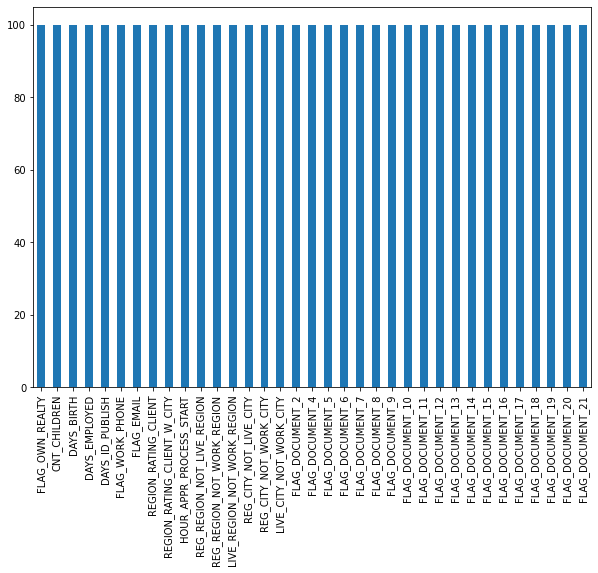

In [70]:
show_null_per_variable(train[get_numerical_categorical(train)[0]])

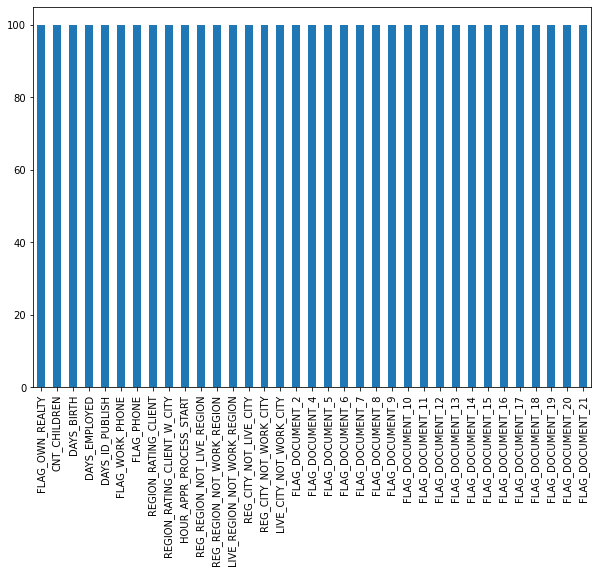

In [71]:
show_null_per_variable(test[get_numerical_categorical(test)[0]])

In [72]:
print(get_numerical_categorical(train)[0])

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


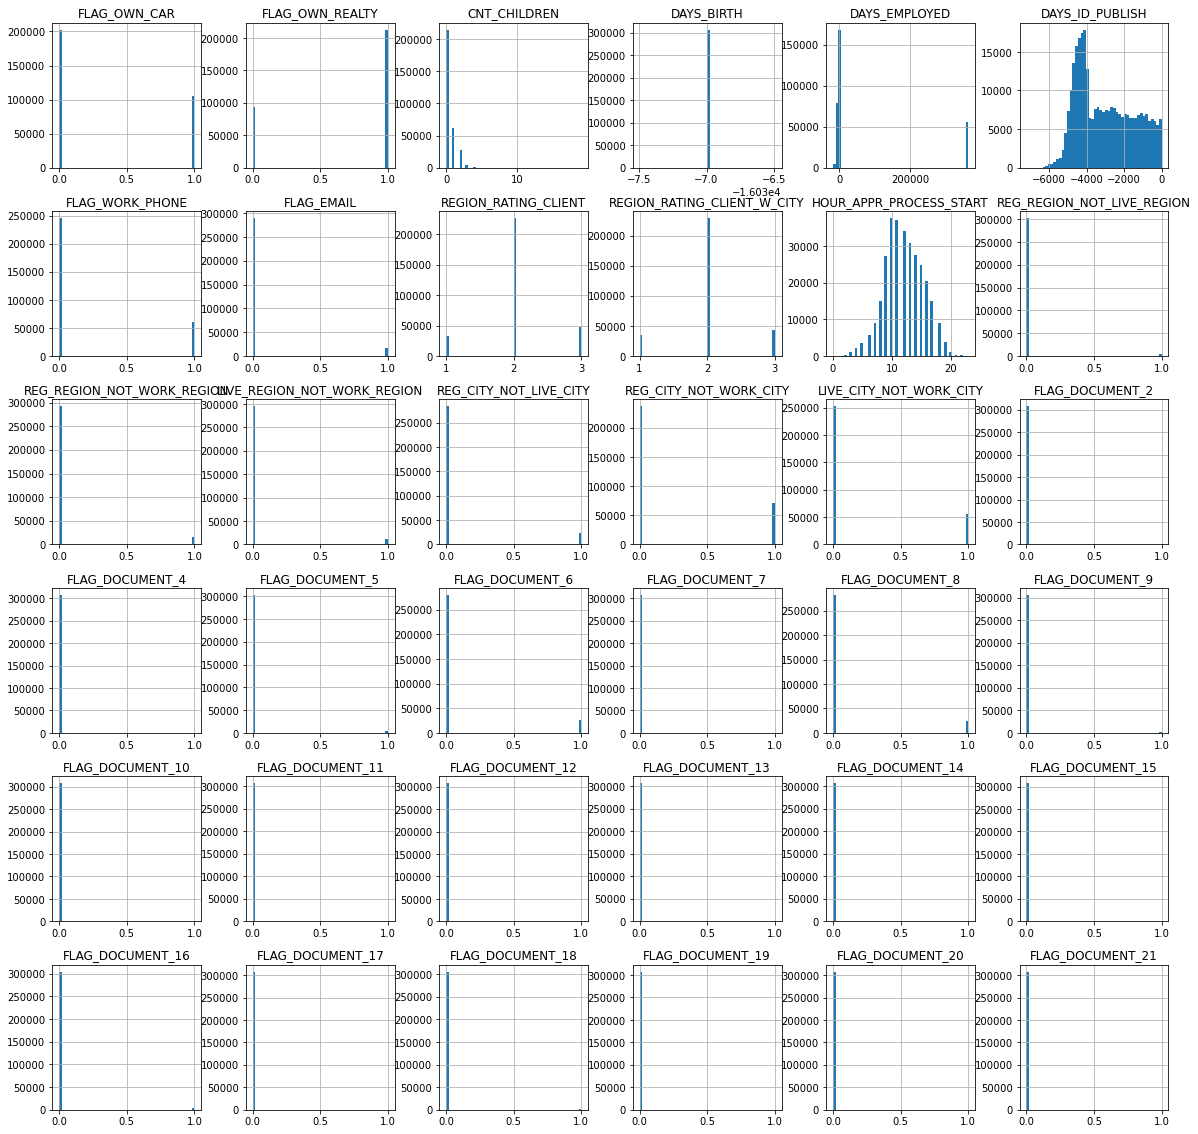

In [73]:
train[get_numerical_categorical(train)[0]].hist(bins=50, figsize= (20,20))
plt.show()

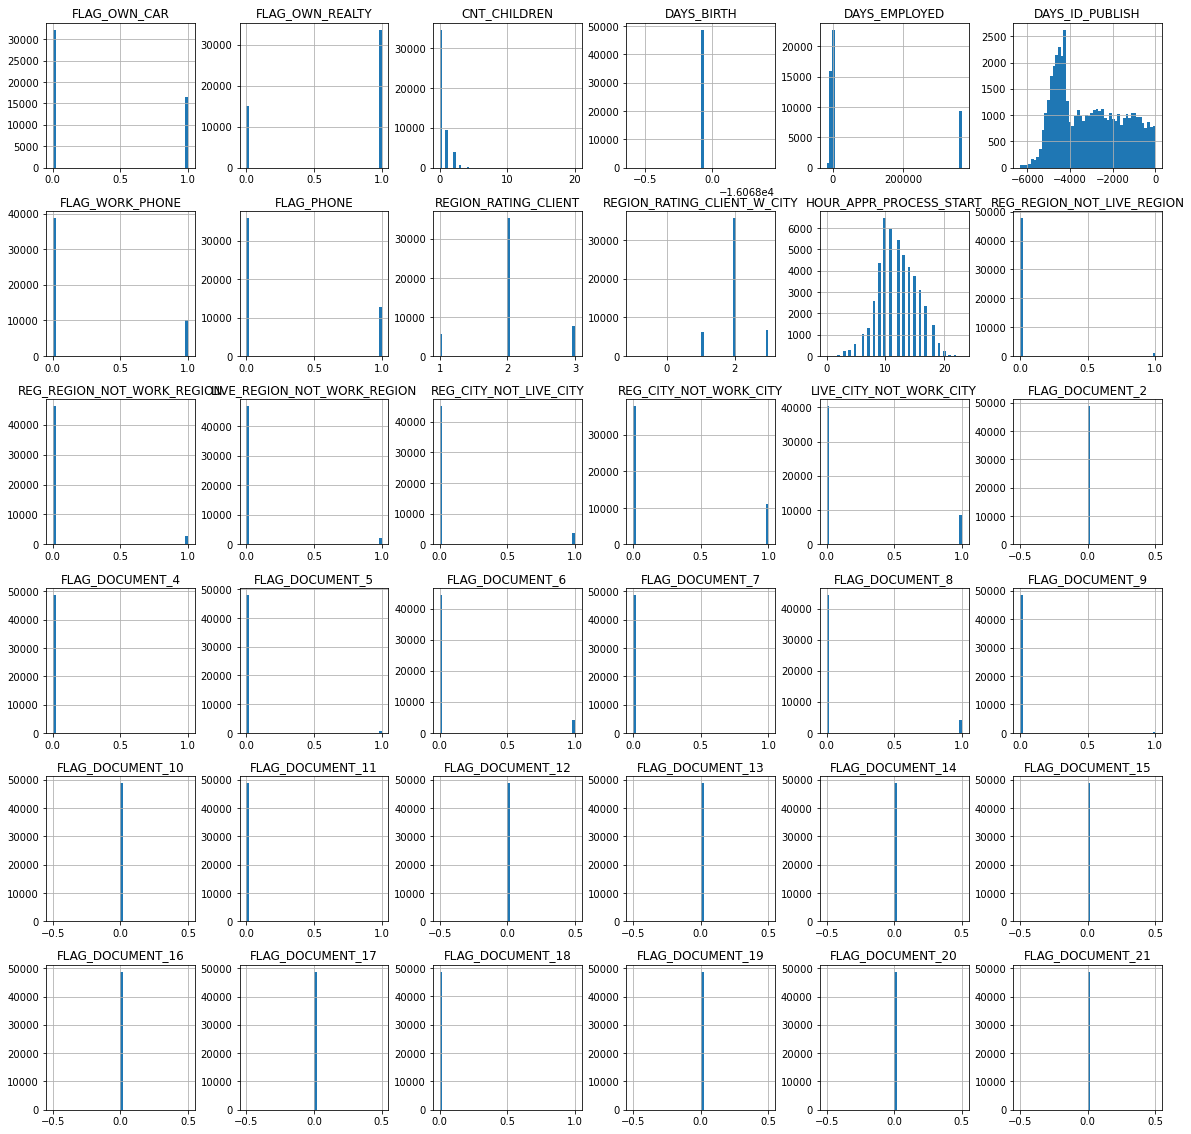

In [74]:
test[get_numerical_categorical(test)[0]].hist(bins=50, figsize= (20,20))
plt.show()

* deduce which columns to treat in log transformation for train and test

In [75]:
columns_log_transform = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 
'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY' ]

In [76]:
print(get_numerical_categorical(test)[0])

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [77]:
columns_log_transform_ = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 
 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 
 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

In [78]:
train.shape

(307511, 122)

In [79]:
def gini(arr):
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(arr)])
    return coef_*weighted_sum/(arr.sum()) - const_

def lorenz(arr):
    
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

#courbe de lorenz pour chacun des indicateurs sélectionnés pour étudier sa concentration : population growth
def plot_lorenz(df, columns_log_transform):
    for c in columns_log_transform :
        arr= df[c].array.to_numpy()
        #arr l'array des valeur de indicator trié
        arr.sort()
        print("Courbe de Lorenz pour l\'indicateur : "+ c)
        print("Indice de gini : "+str(gini(arr)))
        lorenz_curve = lorenz(arr)
        plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
        # plot the straight line perfect equality curve
        plt.plot([0,1], [0,1])
        plt.show()
        # show the gini index!
        
    
    

Courbe de Lorenz pour l'indicateur : FLAG_OWN_CAR
Indice de gini : 0.6598918412674666


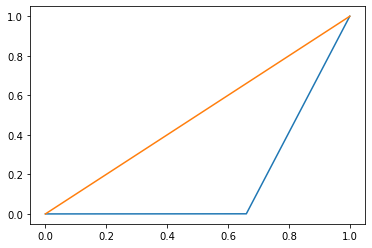

Courbe de Lorenz pour l'indicateur : FLAG_OWN_REALTY
Indice de gini : 0.3063272533340271


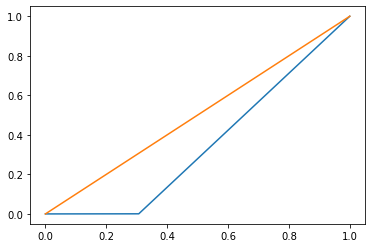

Courbe de Lorenz pour l'indicateur : CNT_CHILDREN
Indice de gini : 0.7598575529645564


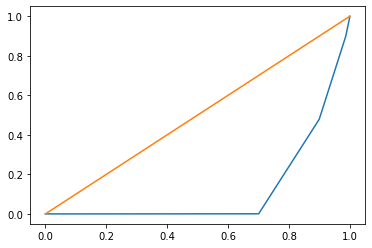

Courbe de Lorenz pour l'indicateur : DAYS_BIRTH
Indice de gini : 4.440892098500626e-16


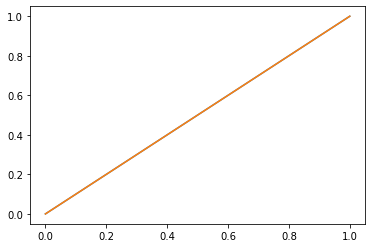

Courbe de Lorenz pour l'indicateur : DAYS_EMPLOYED
Indice de gini : 0.8627604586141127


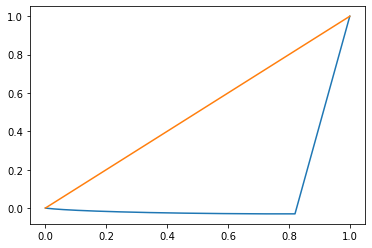

Courbe de Lorenz pour l'indicateur : DAYS_ID_PUBLISH
Indice de gini : -0.28761635287275655


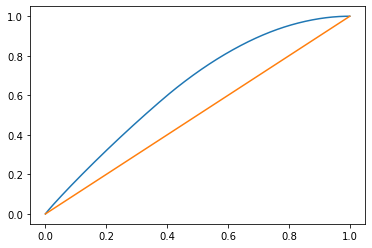

Courbe de Lorenz pour l'indicateur : FLAG_WORK_PHONE
Indice de gini : 0.8006315221244118


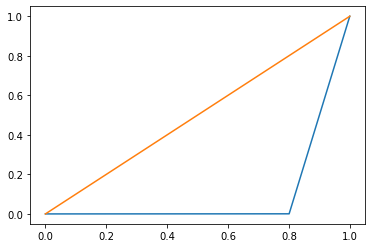

Courbe de Lorenz pour l'indicateur : FLAG_EMAIL
Indice de gini : 0.9432800777858352


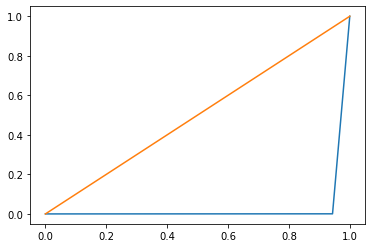

Courbe de Lorenz pour l'indicateur : REGION_RATING_CLIENT
Indice de gini : 0.11021083840375034


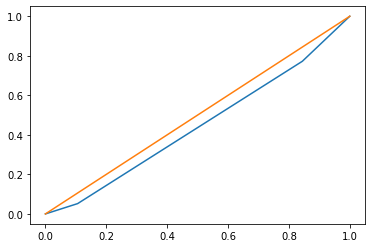

Courbe de Lorenz pour l'indicateur : REGION_RATING_CLIENT_W_CITY
Indice de gini : 0.10880970610996088


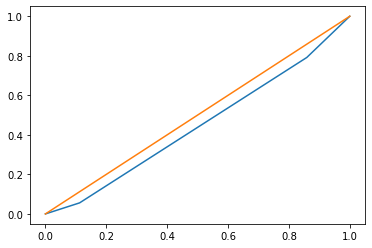

Courbe de Lorenz pour l'indicateur : HOUR_APPR_PROCESS_START
Indice de gini : 0.15270794628389872


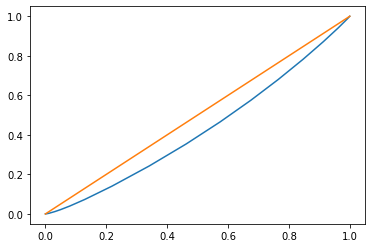

Courbe de Lorenz pour l'indicateur : REG_REGION_NOT_LIVE_REGION
Indice de gini : 0.9848558262956446


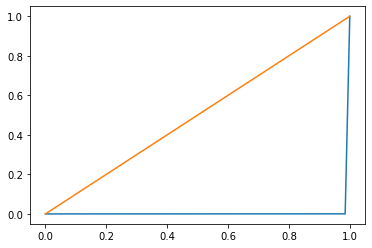

Courbe de Lorenz pour l'indicateur : REG_REGION_NOT_WORK_REGION
Indice de gini : 0.9492310844164924


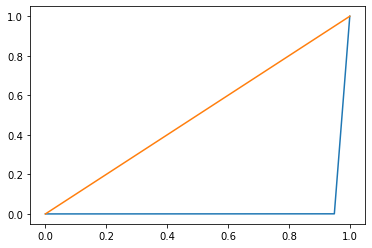

Courbe de Lorenz pour l'indicateur : LIVE_REGION_NOT_WORK_REGION
Indice de gini : 0.9593412918562261


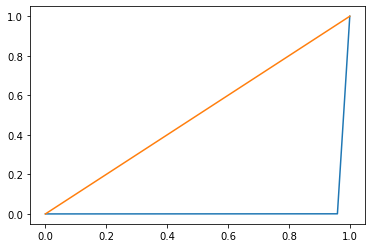

Courbe de Lorenz pour l'indicateur : REG_CITY_NOT_LIVE_CITY
Indice de gini : 0.921827186669745


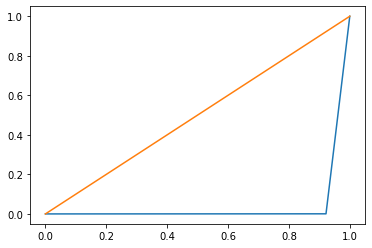

Courbe de Lorenz pour l'indicateur : REG_CITY_NOT_WORK_CITY
Indice de gini : 0.7695464552487552


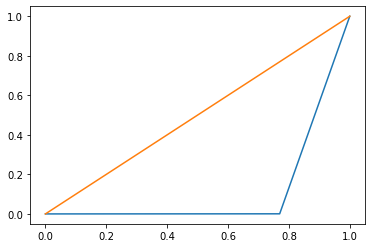

Courbe de Lorenz pour l'indicateur : LIVE_CITY_NOT_WORK_CITY
Indice de gini : 0.8204454474799276


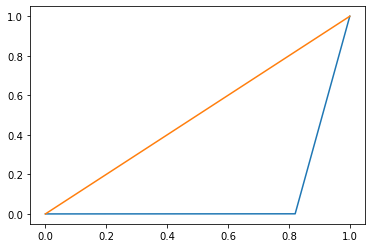

Courbe de Lorenz pour l'indicateur : FLAG_OWN_CAR
Indice de gini : 0.6628713277531593


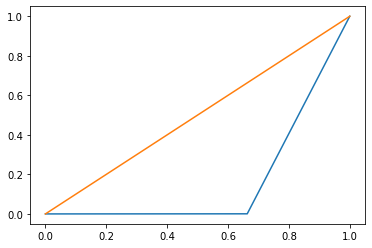

Courbe de Lorenz pour l'indicateur : FLAG_OWN_REALTY
Indice de gini : 0.3094945018874118


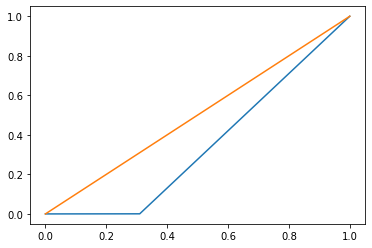

Courbe de Lorenz pour l'indicateur : CNT_CHILDREN
Indice de gini : 0.7680957303981122


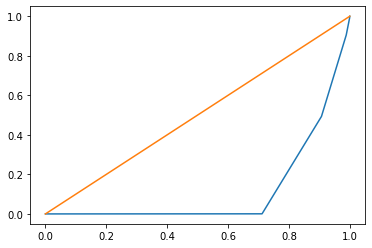

Courbe de Lorenz pour l'indicateur : DAYS_BIRTH
Indice de gini : 0.0


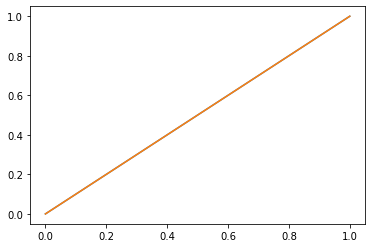

Courbe de Lorenz pour l'indicateur : DAYS_EMPLOYED
Indice de gini : 0.8507160756645591


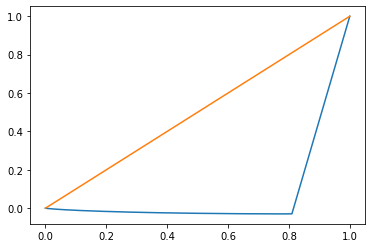

Courbe de Lorenz pour l'indicateur : DAYS_ID_PUBLISH
Indice de gini : -0.2943759034906883


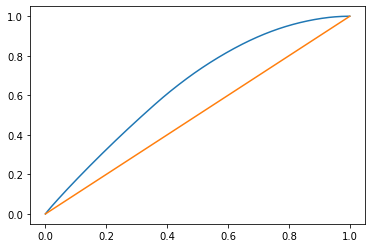

Courbe de Lorenz pour l'indicateur : FLAG_WORK_PHONE
Indice de gini : 0.7952978828163466


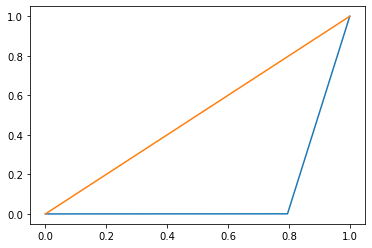

Courbe de Lorenz pour l'indicateur : FLAG_EMAIL
Indice de gini : 0.8373543410471032


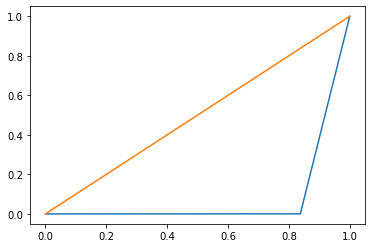

Courbe de Lorenz pour l'indicateur : REGION_RATING_CLIENT
Indice de gini : 0.1158950580664646


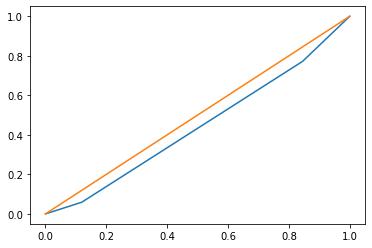

Courbe de Lorenz pour l'indicateur : REGION_RATING_CLIENT_W_CITY
Indice de gini : 0.1145856843941837


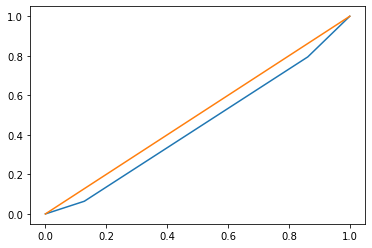

Courbe de Lorenz pour l'indicateur : HOUR_APPR_PROCESS_START
Indice de gini : 0.15380726187131688


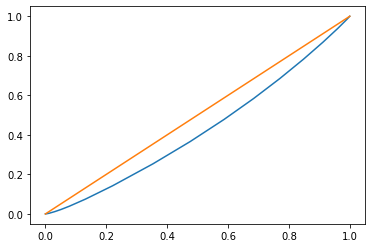

Courbe de Lorenz pour l'indicateur : REG_REGION_NOT_LIVE_REGION
Indice de gini : 0.9811669128508123


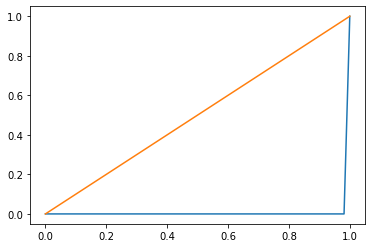

Courbe de Lorenz pour l'indicateur : REG_REGION_NOT_WORK_REGION
Indice de gini : 0.9448342360085344


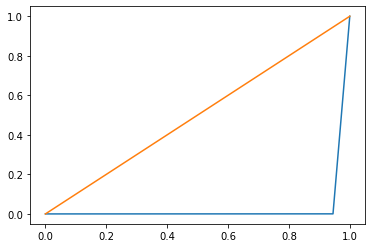

Courbe de Lorenz pour l'indicateur : LIVE_REGION_NOT_WORK_REGION
Indice de gini : 0.9579640571147217


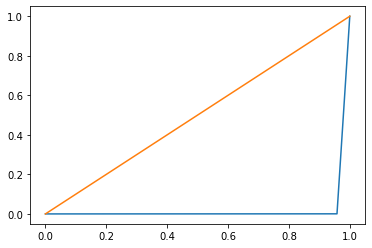

Courbe de Lorenz pour l'indicateur : REG_CITY_NOT_LIVE_CITY
Indice de gini : 0.922534055473494


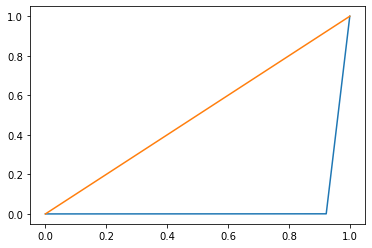

Courbe de Lorenz pour l'indicateur : REG_CITY_NOT_WORK_CITY
Indice de gini : 0.7753364516658459


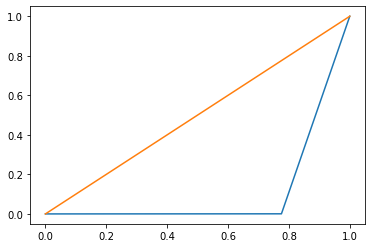

Courbe de Lorenz pour l'indicateur : LIVE_CITY_NOT_WORK_CITY
Indice de gini : 0.8257836861972754


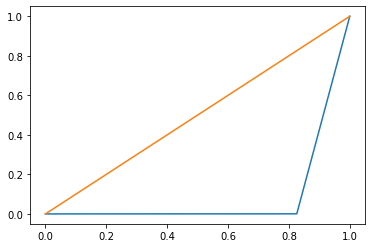

In [80]:
plot_lorenz(train, columns_log_transform)
plot_lorenz(test, columns_log_transform)

* Indice de Gini très haut et forme de la courbe de Lorenz loins de la première biscectrice alors distribution très inégalitaire de la variable


#### Step 2 : find and remove outliers 

In [81]:
    
def find_replace_outliers(df):
    treated_columns = columns_outliers (df)
    df_in = df[treated_columns]
    Q1 = df_in.quantile(0.25)
    Q3 = df_in.quantile(0.75)
    IQR = Q3 - Q1
    
    #remove anomalies
    df[treated_columns] =  df_in[~((df_in < (Q1 - 1.5 * IQR)) |(df_in > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df 

In [82]:
def columns_outliers(df):
    numerical, category = get_numerical_categorical(df)
    id_columns = []
    for c in numerical :
        #no outliers on income
        if 'SK_ID' in c or c == 'AMT_INCOME_TOTAL':
            id_columns.append(c)
    
    print(len(id_columns))
    treated_columns= [ele for ele in numerical if ele not in id_columns]
    return treated_columns
print("replace outliers ")  
#eliminate id form numericla
train = find_replace_outliers(train)
test = find_replace_outliers(test)
train.shape
test.shape

replace outliers 
0
0


(48744, 121)

In [83]:
# ne pas appliquer la transformation log sur les variables avec une valeur dominante = 1 
def transform_variables_log( df, columns):
    for c in columns :
        log_c = 'Log_'+c
        df[log_c]= df[c]
        for index, row in df.iterrows():
            row[log_c] = np.log2(abs(float(row[c]))+0.0001)
            #if pd.isnull(row[c]):
                #row[log_c] =0
            #else :
            
        print(df[log_c].head())
    print (df.shape)
    df= df.drop(columns, axis=1)
    print(df.shape)
    return df


In [84]:
train[columns_log_transform].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
transform_variables_log(train, columns_log_transform)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_FLAG_OWN_CAR, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_FLAG_OWN_REALTY, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_CNT_CHILDREN, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_DAYS_BIRTH, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_DAYS_EMPLOYED, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_DAYS_ID_PUBLISH, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_FLAG_WORK_PHONE, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_FLAG_EMAIL, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_REGION_RATING_CLIENT, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_REGION_RATING_CLIENT_W_CITY, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_HOUR_APPR_PROCESS_START, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_REG_REGION_NOT_LIVE_REGION, dtype: float6

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,Log_FLAG_EMAIL,Log_REGION_RATING_CLIENT,Log_REGION_RATING_CLIENT_W_CITY,Log_HOUR_APPR_PROCESS_START,Log_REG_REGION_NOT_LIVE_REGION,Log_REG_REGION_NOT_WORK_REGION,Log_LIVE_REGION_NOT_WORK_REGION,Log_REG_CITY_NOT_LIVE_CITY,Log_REG_CITY_NOT_WORK_CITY,Log_LIVE_CITY_NOT_WORK_CITY
0,100002,True,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,False,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,False,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,False,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,False,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,False,Cash loans,M,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,False,Cash loans,F,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,False,Cash loans,F,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,True,Cash loans,F,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
transform_variables_log(test, columns_log_transform_)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_FLAG_OWN_CAR, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_FLAG_OWN_REALTY, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_CNT_CHILDREN, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_DAYS_BIRTH, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_DAYS_EMPLOYED, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_DAYS_ID_PUBLISH, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_FLAG_WORK_PHONE, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_FLAG_PHONE, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_REGION_RATING_CLIENT, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_REGION_RATING_CLIENT_W_CITY, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_HOUR_APPR_PROCESS_START, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Log_REG_REGION_NOT_LIVE_REGION, dtype: float6

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,Log_FLAG_PHONE,Log_REGION_RATING_CLIENT,Log_REGION_RATING_CLIENT_W_CITY,Log_HOUR_APPR_PROCESS_START,Log_REG_REGION_NOT_LIVE_REGION,Log_REG_REGION_NOT_WORK_REGION,Log_LIVE_REGION_NOT_WORK_REGION,Log_REG_CITY_NOT_LIVE_CITY,Log_REG_CITY_NOT_WORK_CITY,Log_LIVE_CITY_NOT_WORK_CITY
0,100001,Cash loans,F,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,Cash loans,M,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,Cash loans,M,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100028,Cash loans,F,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100038,Cash loans,M,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48740,456222,Cash loans,F,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48742,456224,Cash loans,M,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
train.shape

(307511, 139)

In [88]:
test.shape

(48744, 138)

In [ ]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)
    
#for c in columns_log_transform : 
    #kde_target(c, train)
    
#for c in columns_log_transform_ : 
    #kde_target(c, test)

#### Step 3 : complete /remove nan values

In [90]:
#scenario 1 : eliminer les nan 
train =  train.dropna()

In [91]:
#scenario 1 : eliminer les nan 
test = test.dropna()

In [92]:
train.shape

(4183, 139)

In [ ]:
# Scenario 1 :
#imputation only when needed
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
def KNN_imputer_n(df, n_neighbors, columns):
    X = df.values
    imputer = KNNImputer(n_neighbors=n_neighbors,  weights="uniform", metric='nan_euclidean')
    imputer.fit_transform(X)
    Xtrans = imputer.transform(X)
    df_imputed = pd.DataFrame(Xtrans, columns= columns)
    return df_imputed 
#train_ = KNN_imputer_n(train[numerical], 5 , numerical)
#test_ = KNN_imputer_n(test[numerical], 5 , numerical)

#### Step 4: Encoding categorical features

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
def label_encoder(labelencoder, df, column):
    df[column] = labelencoder.fit_transform(df[column])
    return df


In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
def one_hot_encoder(enc, df, columns):
    for column in columns :
        df_encoded  = pd.get_dummies(df[column],  prefix = column)
        df= pd.concat([df, df_encoded], axis = 1)
        df= df.drop_duplicates()
    return df

In [ ]:
def get_label_one_hot_columns (df):
    num, cat = get_numerical_categorical(df)
    for column in cat :
        label_encoded = []
        one_hot_encoded = []
        if len(train[column].unique())<3:
            label_encoded.append(column)
        else : 
            one_hot_encoded.append(column)
        return label_encoded, one_hot_encoded


In [ ]:
label_encoded, one_hot_encoded = get_label_one_hot_columns (df_application_train)
train.head()

In [ ]:
print(one_hot_encoded)
print(label_encoded)
one_hot_encoder(enc, train, one_hot_encoded)
label_encoder(labelencoder, train, label_encoded)

In [ ]:
label_encoded_, one_hot_encoded_ = get_label_one_hot_columns (df_application_test)
one_hot_encoder(enc, test, one_hot_encoded_)
label_encoder(labelencoder, test, label_encoded_)

#### Step 5 : new features 

In [ ]:
# FEATURE 1 - NUMBER OF PAST LOANS PER CUSTOMER

B = df_bureau.copy()
grp = B[['SK_ID_CURR', 'DAYS_CREDIT']].groupby(by = ['SK_ID_CURR'])['DAYS_CREDIT'].count().reset_index().rename(index=str, columns={'DAYS_CREDIT': 'BUREAU_LOAN_COUNT'})
B = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')
print(B.shape)

In [ ]:
B['BUREAU_LOAN_COUNT'].unique()

In [ ]:
# FEATURE 2 - NUMBER OF TYPES OF PAST LOANS PER CUSTOMER

#B = df_bureau.copy()
grp = B[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(index=str, columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})
B = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')
print(B.shape)

In [ ]:
B['BUREAU_LOAN_TYPES'].unique()

In [ ]:
# FEATURE 3 - AVERAGE NUMBER OF PAST LOANS PER TYPE PER CUSTOMER
print(B.columns)
# Average Number of Loans per Loan Type
B['AVERAGE_LOAN_TYPE'] = B['BUREAU_LOAN_COUNT']/B['BUREAU_LOAN_TYPES']
del B['BUREAU_LOAN_COUNT'], B['BUREAU_LOAN_TYPES']
import gc
gc.collect()
print(B.shape)


In [ ]:
B['AVERAGE_LOAN_TYPE' ].unique()

In [ ]:
B['AVERAGE_LOAN_TYPE' ].head(10)

In [ ]:
# FEATURE 4 - % OF ACTIVE LOANS FROM BUREAU DATA

# Create a new dummy column for whether CREDIT is ACTIVE OR CLOED 
B['CREDIT_ACTIVE_BINARY'] = B['CREDIT_ACTIVE']

def f(x):
    if x == 'Closed':
        y = 0
    else:
        y = 1    
    return y

B['CREDIT_ACTIVE_BINARY'] = B.apply(lambda x: f(x.CREDIT_ACTIVE), axis = 1)

# Calculate mean number of loans that are ACTIVE per CUSTOMER 
grp = B.groupby(by = ['SK_ID_CURR'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
B = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del B['CREDIT_ACTIVE_BINARY']
import gc
gc.collect()
print(B.shape)

B[B['SK_ID_CURR'] == 100653]

In [ ]:
# FEATURE 5 AVERAGE NUMBER OF DAYS BETWEEN SUCCESSIVE PAST APPLICATIONS FOR EACH CUSTOMER

#B = df_bureau.copy()
# Groupby each Customer and Sort values of DAYS_CREDIT in ascending order
grp = B[['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT']].groupby(by = ['SK_ID_CURR'])
grp1 = grp.apply(lambda x: x.sort_values(['DAYS_CREDIT'], ascending = False)).reset_index(drop = True)#rename(index = str, columns = {'DAYS_CREDIT': 'DAYS_CREDIT_DIFF'})
print("Grouping and Sorting done")

# Calculate Difference between the number of Days 
grp1['DAYS_CREDIT1'] = grp1['DAYS_CREDIT']*-1
grp1['DAYS_DIFF'] = grp1.groupby(by = ['SK_ID_CURR'])['DAYS_CREDIT1'].diff()
grp1['DAYS_DIFF'] = grp1['DAYS_DIFF'].fillna(0).astype('uint32')
del grp1['DAYS_CREDIT1'], grp1['DAYS_CREDIT'], grp1['SK_ID_CURR']
gc.collect()
print("Difference days calculated")

B = B.merge(grp1, on = ['SK_ID_BUREAU'], how = 'left')
print("Difference in Dates between Previous CB applications is CALCULATED ")
print(B.shape)

In [ ]:
# FEATURE 6 % of LOANS PER CUSTOMER WHERE END DATE FOR CREDIT IS PAST

#B = df_bureau.copy()
B['CREDIT_ENDDATE_BINARY'] = B['DAYS_CREDIT_ENDDATE']

def f(x):
    if x<0:
        y = 0
    else:
        y = 1   
    return y

B['CREDIT_ENDDATE_BINARY'] = B.apply(lambda x: f(x.DAYS_CREDIT_ENDDATE), axis = 1)
print("New Binary Column calculated")

grp = B.groupby(by = ['SK_ID_CURR'])['CREDIT_ENDDATE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ENDDATE_BINARY': 'CREDIT_ENDDATE_PERCENTAGE'})
B = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')

del B['CREDIT_ENDDATE_BINARY']
gc.collect()
print(B.shape)

In [ ]:
B['CREDIT_ENDDATE_PERCENTAGE'].head()

In [ ]:
B['CREDIT_ENDDATE_PERCENTAGE'].unique()

In [ ]:
# FEATURE 7 AVERAGE NUMBER OF DAYS IN WHICH CREDIT EXPIRES IN FUTURE -INDICATION OF CUSTOMER DELINQUENCY IN FUTURE??

# Repeating Feature 6 to Calculate all transactions with ENDATE as POSITIVE VALUES 

#B = df_bureau.copy()
# Dummy column to calculate 1 or 0 values. 1 for Positive CREDIT_ENDDATE and 0 for Negative
B['CREDIT_ENDDATE_BINARY'] = B['DAYS_CREDIT_ENDDATE']

def f(x):
    if x<0:
        y = 0
    else:
        y = 1   
    return y

B['CREDIT_ENDDATE_BINARY'] = B.apply(lambda x: f(x.DAYS_CREDIT_ENDDATE), axis = 1)
print("New Binary Column calculated")

# We take only positive values of  ENDDATE since we are looking at Bureau Credit VALID IN FUTURE 
# as of the date of the customer's loan application with Home Credit 
B1 = B[B['CREDIT_ENDDATE_BINARY'] == 1]
B1.shape

#Calculate Difference in successive future end dates of CREDIT 

# Create Dummy Column for CREDIT_ENDDATE 
B1['DAYS_CREDIT_ENDDATE1'] = B1['DAYS_CREDIT_ENDDATE']
# Groupby Each Customer ID 
grp = B1[['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT_ENDDATE1']].groupby(by = ['SK_ID_CURR'])
# Sort the values of CREDIT_ENDDATE for each customer ID 
grp1 = grp.apply(lambda x: x.sort_values(['DAYS_CREDIT_ENDDATE1'], ascending = True)).reset_index(drop = True)
del grp
gc.collect()
print("Grouping and Sorting done")

# Calculate the Difference in ENDDATES and fill missing values with zero 
grp1['DAYS_ENDDATE_DIFF'] = grp1.groupby(by = ['SK_ID_CURR'])['DAYS_CREDIT_ENDDATE1'].diff()
grp1['DAYS_ENDDATE_DIFF'] = grp1['DAYS_ENDDATE_DIFF'].fillna(0).astype('uint32')
del grp1['DAYS_CREDIT_ENDDATE1'], grp1['SK_ID_CURR']
gc.collect()
print("Difference days calculated")

# Merge new feature 'DAYS_ENDDATE_DIFF' with original Data frame for BUREAU DATA
B = B.merge(grp1, on = ['SK_ID_BUREAU'], how = 'left')
del grp = B[['SK_ID_CURR', 'DAYS_ENDDATE_DIFF']].groupby(by = ['SK_ID_CURR'])['DAYS_ENDDATE_DIFF'].mean().reset_index().rename( index = str, columns = {'DAYS_ENDDATE_DIFF': 'AVG_ENDDATE_FUTURE'})
B = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 
#del B['DAYS_ENDDATE_DIFF']
del B['CREDIT_ENDDATE_BINARY'], B['DAYS_CREDIT_ENDDATE']
gc.collect()
print(B.shape)grp1
gc.collect()

# Calculate Average of DAYS_ENDDATE_DIFF

grp = B[['SK_ID_CURR', 'DAYS_ENDDATE_DIFF']].groupby(by = ['SK_ID_CURR'])['DAYS_ENDDATE_DIFF'].mean().reset_index().rename( index = str, columns = {'DAYS_ENDDATE_DIFF': 'AVG_ENDDATE_FUTURE'})
B = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 
#del B['DAYS_ENDDATE_DIFF']
del B['CREDIT_ENDDATE_BINARY'], B['DAYS_CREDIT_ENDDATE']
gc.collect()
print(B.shape)

In [ ]:
# Verification of Feature 
B[B['SK_ID_CURR'] == 100653]
# In the Data frame below we have 3 values not NAN 
# Average of 3 values = (0 +0 + 3292)/3 = 1097.33 
#The NAN Values are Not Considered since these values DO NOT HAVE A FUTURE CREDIT END DATE 

In [ ]:
# FEATURE 8 - DEBT OVER CREDIT RATIO

B[~B['AMT_CREDIT_SUM_LIMIT'].isnull()][0:2]

# WE can see in the Table Below 
# AMT_CREDIT_SUM = AMT_CREDIT_SUM_DEBT + AMT_CREDIT_SUM_LIMIT
B = df_bureau.copy()

B['AMT_CREDIT_SUM_DEBT'] = B['AMT_CREDIT_SUM_DEBT'].fillna(0)
B['AMT_CREDIT_SUM'] = B['AMT_CREDIT_SUM'].fillna(0)

grp1 = B[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = B[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

B = B.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
B = B.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2
gc.collect()

B['DEBT_CREDIT_RATIO'] = B['TOTAL_CUSTOMER_DEBT']/B['TOTAL_CUSTOMER_CREDIT']

del B['TOTAL_CUSTOMER_DEBT'], B['TOTAL_CUSTOMER_CREDIT']
gc.collect()
print(B.shape)

In [ ]:
# FEATURE 9 - OVERDUE OVER DEBT RATIO

#B = df_bureau[0:10000]

B['AMT_CREDIT_SUM_DEBT'] = B['AMT_CREDIT_SUM_DEBT'].fillna(0)
B['AMT_CREDIT_SUM_OVERDUE'] = B['AMT_CREDIT_SUM_OVERDUE'].fillna(0)

grp1 = B[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = B[['SK_ID_CURR', 'AMT_CREDIT_SUM_OVERDUE']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_CUSTOMER_OVERDUE'})

B = B.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
B = B.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2
gc.collect()

B['OVERDUE_DEBT_RATIO'] = B['TOTAL_CUSTOMER_OVERDUE']/B['TOTAL_CUSTOMER_DEBT']

del B['TOTAL_CUSTOMER_OVERDUE'], B['TOTAL_CUSTOMER_DEBT']
gc.collect()
print(B.shape)

In [ ]:
# FEATURE 10 - AVERAGE NUMBER OF LOANS PROLONGED

#B = df_bureau[0:10000]

B['CNT_CREDIT_PROLONG'] = B['CNT_CREDIT_PROLONG'].fillna(0)
grp = B[['SK_ID_CURR', 'CNT_CREDIT_PROLONG']].groupby(by = ['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean().reset_index().rename( index = str, columns = { 'CNT_CREDIT_PROLONG': 'AVG_CREDITDAYS_PROLONGED'})
B = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')
print(B.shape)

In [ ]:
#df_credit_card_balance 

In [ ]:
#FEATURE 1 - NUMBER OF LOANS PER CUSTOMER
CCB = df_credit_card_balance[0:]
grp = CCB.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index().rename(index = str, columns = {'SK_ID_PREV': 'NO_LOANS'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 
gc.collect()
print(CCB.dtypes, CCB.shape)

In [ ]:
#FEATURE 2 - RATE OF PAYBACK OF LOANS - NO OF INSTALMENTS PAID BY CUSTOMER PER LOAN

# CNT_INSTALMENT_MATURE_CUM gives number of installments paid as of that month 
# The Max of this column shows the total number of installments made for that loan 

#CCB = df_credit_card_balance[0:]

# No of Loans per customer 

CCB = df_credit_card_balance[0:]
grp = CCB.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index().rename(index = str, columns = {'SK_ID_PREV': 'NO_LOANS'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 
gc.collect()

print(CCB.dtypes)


# No of Installments paid per Loan per Customer 

grp = CCB.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_MATURE_CUM'].max().reset_index().rename(index = str, columns = {'CNT_INSTALMENT_MATURE_CUM': 'NO_INSTALMENTS'})
grp1 = grp.groupby(by = ['SK_ID_CURR'])['NO_INSTALMENTS'].sum().reset_index().rename(index = str, columns = {'NO_INSTALMENTS': 'TOTAL_INSTALMENTS'})
CCB = CCB.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
del grp, grp1
gc.collect()

# Average Number of installments paid per loan 

CCB['INSTALLMENTS_PER_LOAN'] = (CCB['TOTAL_INSTALMENTS']/CCB['NO_LOANS']).astype('uint32')
del CCB['TOTAL_INSTALMENTS']
del CCB['NO_LOANS']
gc.collect()

print(CCB.dtypes, CCB.shape)

In [ ]:
#FEATURE 3 - AVG % LOADING OF CREDIT LIMIT PER CUSTOMER : HOW BADLY DID THE CUSTOMER NEED THE LOAN?

#CCB = df_credit_card_balance[0:]

CCB['AMT_CREDIT_LIMIT_ACTUAL1'] = CCB['AMT_CREDIT_LIMIT_ACTUAL']

def f(x1, x2):
    
    balance = x1.max()
    limit = x2.max()
    
    return (balance/limit)

# Calculate the ratio of Amount Balance to Credit Limit - CREDIT LOAD OF CUSTOMER 
# This is done for each Credit limit value per loan per Customer 

grp = CCB.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT_LIMIT_ACTUAL']).apply(lambda x: f(x.AMT_BALANCE, x.AMT_CREDIT_LIMIT_ACTUAL1)).reset_index().rename(index = str, columns = {0: 'CREDIT_LOAD1'})
del CCB['AMT_CREDIT_LIMIT_ACTUAL1']
gc.collect()

# We now calculate the mean Credit load of All Loan transactions of Customer 
grp1 = grp.groupby(by = ['SK_ID_CURR'])['CREDIT_LOAD1'].mean().reset_index().rename(index = str, columns = {'CREDIT_LOAD1': 'CREDIT_LOAD'})
print(grp1.dtypes)

CCB = CCB.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
del grp, grp1
gc.collect()

print(CCB.dtypes, CCB.shape)

In [ ]:
#FEATURE 4 - AVERAGE NUMBER OF TIMES DAYS PAST DUE HAS OCCURRED PER CUSTOMER
# Function to calculate number of times Days Past Due occurred 

#CCB = df_credit_card_balance[0:]

def f(DPD):
    
    # DPD is a series of values of SK_DPD for each of the groupby combination 
    # We convert it to a list to get the number of SK_DPD values NOT EQUALS ZERO
    x = DPD.tolist()
    c = 0
    for i,j in enumerate(x):
        if j != 0:
            c += 1
    
    return c 

grp = CCB.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV']).apply(lambda x: f(x.SK_DPD)).reset_index().rename(index = str, columns = {0: 'NO_DPD'})
grp1 = grp.groupby(by = ['SK_ID_CURR'])['NO_DPD'].mean().reset_index().rename(index = str, columns = {'NO_DPD' : 'DPD_COUNT'})

CCB = CCB.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
del grp1
del grp 
gc.collect()

print(CCB.dtypes, CCB.shape)

In [ ]:
#FEATURE 5 - AVERAGE OF DAYS PAST DUE PER CUSTOMER

#CCB = df_credit_card_balance[0:]

grp = CCB.groupby(by= ['SK_ID_CURR'])['SK_DPD'].mean().reset_index().rename(index = str, columns = {'SK_DPD': 'AVG_DPD'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 
gc.collect()

print(CCB.dtypes, CCB.shape)

In [ ]:
#FEATURE 6 - % of MINIMUM PAYMENTS MISSED

#CCB = df_credit_card_balance[0:]

def f(min_pay, total_pay):
    
    M = min_pay.tolist()
    T = total_pay.tolist()
    P = len(M)
    c = 0 
    # Find the count of transactions when Payment made is less than Minimum Payment 
    for i in range(len(M)):
        if T[i] < M[i]:
            c += 1  
    return (100*c)/P

grp = CCB.groupby(by = ['SK_ID_CURR']).apply(lambda x: f(x.AMT_INST_MIN_REGULARITY, x.AMT_PAYMENT_CURRENT)).reset_index().rename(index = str, columns = { 0 : 'PERCENTAGE_MISSED_PAYMENTS'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 
gc.collect()

print(CCB.dtypes, CCB.shape)

In [ ]:
#FEATURE 7 - RATIO OF CASH VS CARD SWIPES
#IF A CUSTOMER IS USING CREDIT CARDS FOR CASH WITHDRAWALS - IS IT A RED FLAG ??

#CCB = df_credit_card_balance[0:]

grp = CCB.groupby(by = ['SK_ID_CURR'])['AMT_DRAWINGS_ATM_CURRENT'].sum().reset_index().rename(index = str, columns = {'AMT_DRAWINGS_ATM_CURRENT' : 'DRAWINGS_ATM'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp
gc.collect()

grp = CCB.groupby(by = ['SK_ID_CURR'])['AMT_DRAWINGS_CURRENT'].sum().reset_index().rename(index = str, columns = {'AMT_DRAWINGS_CURRENT' : 'DRAWINGS_TOTAL'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp
gc.collect()

CCB['CASH_CARD_RATIO1'] = (CCB['DRAWINGS_ATM']/CCB['DRAWINGS_TOTAL'])*100
del CCB['DRAWINGS_ATM']
del CCB['DRAWINGS_TOTAL']
gc.collect()

grp = CCB.groupby(by = ['SK_ID_CURR'])['CASH_CARD_RATIO1'].mean().reset_index().rename(index = str, columns ={ 'CASH_CARD_RATIO1' : 'CASH_CARD_RATIO'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 
gc.collect()

del CCB['CASH_CARD_RATIO1']
gc.collect()

print(CCB.dtypes, CCB.shape)

# WE can leave NaN values as they are for LGBM 

In [ ]:
# FEATURE 8 - AVERAGE DRAWING PER CUSTOMER

#CCB = df_credit_card_balance[0:]

grp = CCB.groupby(by = ['SK_ID_CURR'])['AMT_DRAWINGS_CURRENT'].sum().reset_index().rename(index = str, columns = {'AMT_DRAWINGS_CURRENT' : 'TOTAL_DRAWINGS'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp
gc.collect()

grp = CCB.groupby(by = ['SK_ID_CURR'])['CNT_DRAWINGS_CURRENT'].sum().reset_index().rename(index = str, columns = {'CNT_DRAWINGS_CURRENT' : 'NO_DRAWINGS'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp
gc.collect()

CCB['DRAWINGS_RATIO1'] = (CCB['TOTAL_DRAWINGS']/CCB['NO_DRAWINGS'])*100
del CCB['TOTAL_DRAWINGS']
del CCB['NO_DRAWINGS']
gc.collect()

grp = CCB.groupby(by = ['SK_ID_CURR'])['DRAWINGS_RATIO1'].mean().reset_index().rename(index = str, columns ={ 'DRAWINGS_RATIO1' : 'DRAWINGS_RATIO'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 
gc.collect()

del CCB['DRAWINGS_RATIO1']

print(CCB.dtypes, CCB.shape)

In [ ]:
# OWN_CAR_AGE est à 60% non remplie donc il faut imputer, eneffet si le flag est à 0, la personne ne possede pas une voiture
#donc n'a pas d'info age de voiture, il faut ou bien eliminer la colonne ou imputer 

In [99]:
#OCCUPATION_TYPE : on a 18 veleurs possibles, si on a np.nan alors on met other qui peut être chomage ou autre
#
train['OCCUPATION_TYPE'].unique()

['Laborers', 'Managers', 'Drivers', 'Core staff', 'Accountants', ..., 'Security staff', 'Secretaries', 'Cleaning staff', 'Waiters/barmen staff', 'Low-skill Laborers']
Length: 18
Categories (18, object): ['Laborers', 'Managers', 'Drivers', 'Core staff', ..., 'Secretaries', 'Cleaning staff', 'Waiters/barmen staff', 'Low-skill Laborers']

In [ ]:
df_bureau = df_bureau.merge(df_bureau_balance, on = ["SK_ID_BUREAU"], how = "left")
df_bureau['MIN_MONTH'] = df_bureau.groupby(['SK_ID_BUREAU'])['MONTHS_BALANCE'].transform('min')


In [100]:
df_installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


In [102]:
df_installments_payments['DIFF_DAYS_INS_PAY'] = df_installments_payments['DAYS_INSTALMENT'] - df_installments_payments['DAYS_ENTRY_PAYMENT']
df_installments_payments['DIFF_AMT_INS_PAY'] = df_installments_payments['AMT_INSTALMENT'] - df_installments_payments['AMT_PAYMENT']

In [103]:
df_installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DIFF_DAYS_INS_PAY,DIFF_AMT_INS_PAY
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863,7.0,0.000000
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024,0.0,0.000000
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000,0.0,0.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859,8.0,0.000000
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961,-17.0,4.455078


In [106]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df_previous_application['PRODUCT_COMBINATION'].unique()

['POS mobile with interest', 'Cash X-Sell: low', 'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high', ..., 'Cash Street: low', 'POS industry without interest', 'Cash Street: middle', 'POS others without interest', NaN]
Length: 18
Categories (17, object): ['POS mobile with interest', 'Cash X-Sell: low', 'Cash X-Sell: high', 'Cash X-Sell: middle', ..., 'Cash Street: low', 'POS industry without interest', 'Cash Street: middle', 'POS others without interest']

In [ ]:
df_previous_application ['DAY_PROCESS_START'] = [] # 0 si semaine,  1 si weekend 
df_previous_application ['HOUROCESS_START'] = [] # 0 si entre minuit et 7h et 1 sinon

In [107]:
# normalize AMT application et AMT credit et AMT goods 
df_previous_application['AMT_DOWN_PAYMENT'].unique()
df_previous_application['DIFF_APP_CRE'] = df_previous_application['AMT_APPLICATION']/df_previous_application['AMT_CREDIT'] 
df_previous_application['DOWN_PERCENTAGE'] = df_previous_application['AMT_DOWN_PAYMENT'] /df_previous_application['AMT_CREDIT'] 
df_previous_application['DIFF_APP_GOODS'] = df_previous_application['AMT_APPLICATION']/df_previous_application['AMT_CREDIT']
df_previous_application['DIFF_CRE_GOODS'] = df_previous_application['AMT_CREDIT'] / df_previous_application['AMT_GOODS_PRICE']
df_previous_application['FLAG_DOWN'] = #1 si >0 0 sinon ou si nan

array([    0.  ,      nan, 12649.5 , ...,  4099.95, 55325.25, 50476.5 ],
      dtype=float32)

In [ ]:
df_previous_application[''] product_catacteristics.groupby(['SK_ID_CURR'])[''].transform('mean')
df_previous_application['DIFF_APP_CRE'] = df_previous_application.groupby(['SK_ID_CURR'])['DIFF_APP_CRE'].transform('mean') 
df_previous_application['DOWN_PERCENTAGE'] = df_previous_application.groupby(['SK_ID_CURR'])['DOWN_PERCENTAGE'].transform('mean') 
df_previous_application['DIFF_APP_GOODS'] = df_previous_application.groupby(['SK_ID_CURR'])['DIFF_APP_GOODS'].transform('mean')
df_previous_application['DIFF_CRE_GOODS'] = df_previous_application.groupby(['SK_ID_CURR'])['DIFF_CRE_GOODS'].transform('mean')
df_previous_application['FLAG_DOWN'] = df_previous_application.groupby(['SK_ID_CURR'])['FLAG_DOWN'].transform('max')

In [ ]:
train = train.merge(B, on = ['SK_ID_CURR'], how = 'left')
train = train.merge(CCB, on = ['SK_ID_CURR'], how = 'left')

test = test.merge(B, on = ['SK_ID_CURR'], how = 'left')
test = test.merge(CCB, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
IC = df_installments_payments.copy()
PC = df_POS_CASH_balance.copy()
PA = df_previous_application.copy()
SS = df_sample_submission.copy()

In [ ]:

PA = PA.merge(IC,on = ['SK_ID_PREV'], how = 'left')
PA = PA.merge(PC ,on = ['SK_ID_PREV'], how = 'left')

train = train.merge(PA, on = ['SK_ID_PREV'], how = 'left')
test = test.merge(PA, on = ['SK_ID_PREV'], how = 'left')


train = train.merge(SS, on = ['SK_ID_CURR'], how = 'left')
test = test.merge(SS, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
# agregation on columns 


In [ ]:
train.head(20)

In [ ]:
test.head(20)

## Handle class inbalance with SMOTE 

In [ ]:
from imblearn.over_sampling import SMOTE 
def handle_unbalanced_data(X):
    sm = SMOTE(random_state=42)
    X_sm, y_sm = sm.fit_resample(X, y)

    print(f'''Shape of X before SMOTE: {X.shape}
    Shape of X after SMOTE: {X_sm.shape}''')

    print('\nBalance of positive and negative classes (%):')
    y_sm.value_counts(normalize=True) * 100

In [ ]:
#new dataset values
handle_unbalanced_data(train)
handle_unbalanced_data(test)



In [ ]:
train.head()

In [ ]:
test.head()

## Client Classification 
* we compute a score representing risks related to the client profile and we deduce wether the client should be given or not the loan --> the score represents a probability 
### Examples with pycaret

In [ ]:
from pycaret.classification import * 
#setting the experiment
reg_experiment = setup(bank_clients_df, 
                       target = 'target', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_banking')

In [ ]:
#best_model = compare_models(exclude=['xgboost'], fold=5)
best_model = compare_models(exclude=[], fold=5)

In [ ]:
def create_tune_model(model_name):
    model  = create_model(model_name)
    tuned_model = tune_model(model, n_iter=50, optimize = 'MAE')
    print('Residual Plot')
    plot_model(tuned_model)
    print('Prediction Error')
    plot_model(tuned_model, plot = 'error')
    print('Feature Importances')
    plot_model(tuned_model, plot = 'feature')
    print('Model evaluation')
    evaluate_model(tuned_model)
    print('Model interpretation')
    interpret_model(tuned_model)
    
    

In [ ]:
#linear models
create_tune_model('ridge')
create_tune_model('lasso')
create_tune_model('en')

In [ ]:
# Ridge alternatives
create_tune_model( 'br') 
create_tune_model('kr')

In [ ]:
#kernel based model
create_tune_model('svm')

In [ ]:
# nearest neighbor 
create_tune_model('knn')

In [ ]:
#decision tree models
create_tune_model('dt')
create_tune_model( 'rf') 

In [ ]:
# Boosting model
create_tune_model('ada')
create_tune_model('gbr')
create_tune_model('lightgbm') 
create_tune_model('xgboost')

## Using a neural network for score computing : use an ANN 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

### ROC Curves and AUC : used when data is balanced

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Precision-Recall Curves : used in case of class imbalance
peut être ustilisée si on n'a pas appliqué SMOTE

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## MLflow UI

In [ ]:
!mlflow ui

## Model Deployment

In [ ]:
aws configure

In [ ]:
deploy_model(automl_model, model_name = 'automl-model-aws', 
             platform='aws',
             authentication = {'bucket' : 'pycaret-ca-bank_score-model'})


# Annexe 

In [ ]:
def count_categorical(df, group_var, df_name):
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

def agg_numeric(df, group_var, df_name):

    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg


bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()
# Merge with the value counts of bureau
train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')


bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head()
# Merge with the stats of bureau
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')


bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')

# Calculate all correlations in dataframe
corrs = train.corr()

corrs = corrs.sort_values('TARGET', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

# Ten most negative correlations
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

# Merge in the previous information
train = train.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
train = train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

test = test.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
test = test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

# Remove variables to free memory
gc.enable()
del previous, previous_agg, previous_counts
gc.collect()


def missing_values_table(df, print_info = False):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        if print_info:
            # Print some summary information
            print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
                "There are " + str(mis_val_table_ren_columns.shape[0]) +
                  " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
print('Cash by Client Shape: ', cash_by_client.shape)
train = train.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del cash, cash_by_client
gc.collect()